 Volterra NMSE: -37.59439619271327 dB
Using cpu device
Epoch  10/10  Loss=1.1698e+00  Valid Loss=1.5959e-01  LR=1.00e-03

Best model from epoch 10 with validation loss: 1.5959e-01
Test NMSE: -25.61 dB


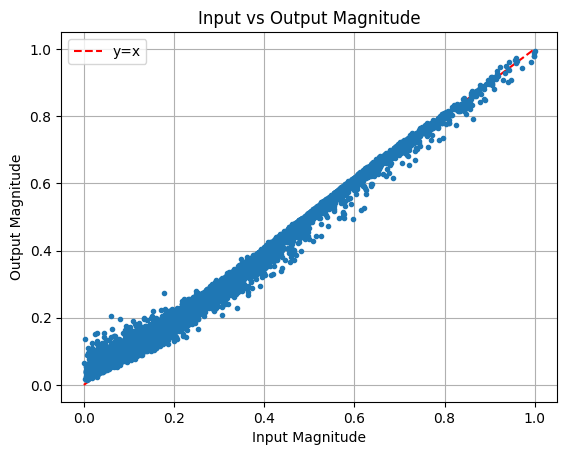

In [1]:
from sparseDPD import Volterra
from sparseDPD import Dataset
from sparseDPD import Datapath
from sparseDPD import DataManager
from sparseDPD import NeuralNetwork

simpleDataManager = DataManager(filepath='PA_IO.mat', num_training_points=10000, num_validaiton_points=2000, num_test_points=2000)

# Setup a volterra model and a volterra inverse
volterra_forward_model = Volterra(num_nl_orders=5, num_memory_levels=3, dataset=simpleDataManager.training_dataset)
volterra_invserse_model = Volterra(num_nl_orders=5, num_memory_levels=3, dataset=simpleDataManager.training_dataset)

print(f" Volterra NMSE: {volterra_forward_model.calculate_volterra_nmse(simpleDataManager.test_dataset)} dB")
training_dataset = simpleDataManager.training_dataset

# Traing small Inverse Model 
simple_nn_inv = NeuralNetwork(num_memory_levels=3, model_type='PNTDNN', forward_model=False)
train_losses, valid_losses, best_epoch = simple_nn_inv.get_best_model(num_epochs=10, training_dataset=training_dataset, validation_dataset=simpleDataManager.validation_dataset, learning_rate=1e-3)

# Create datapath with volterra forward model and nn inverse model
datapath = Datapath(forward_model=volterra_forward_model, inverse_model=simple_nn_inv)
# Process test data through datapath
test_dataset = datapath.process(simpleDataManager.test_dataset.input_data)
# Calculate NMSE
nmse = test_dataset.calculate_nmse()
print(f"Test NMSE: {nmse:.2f} dB")
# Plot input vs output magnitude
Datapath.plot_signals(test_dataset)

In [ ]:
# Test NN forward performance
forward_nn = NeuralNetwork(num_memory_levels=3, model_type='PNTDNN_Deep', forward_model=True)
train_losses_fwd, valid_losses_fwd, best_epoch_fwd = forward_nn.get_best_model(num_epochs=500, training_dataset=simpleDataManager.training_dataset, validation_dataset=simpleDataManager.validation_dataset, learning_rate=1e-3)
# Print NMSE for forward model
fwd_nmse = forward_nn.calculate_forward_nmse(simpleDataManager.test_dataset)
print(f"NN Forward Model NMSE: {fwd_nmse:.2f} dB")